In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from plotly.subplots import make_subplots
import datetime as dt
from datetime import timedelta
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
data=pd.read_csv("../data/BTCL.csv")
data

,DateTime,BTCL
0,2020-04-23 06:34:02,158
1,2020-04-23 09:34:02,158
2,2020-04-24 06:34:01,158
3,2020-04-24 09:34:02,158
4,2020-04-27 06:33:57,158
...,...,...
2497,2022-07-14 04:55:53,656
2498,2022-07-14 05:55:54,625
2499,2022-07-14 07:55:52,625
2500,2022-07-14 08:55:53,625


In [3]:
#Changing datetime to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime']).dt.date

#renaming the columns
data.rename(columns = {'DateTime':'date','BTCL':'price'}, inplace = True)
data['date'] = pd.to_datetime(data['date'],format = "%Y-%m-%d")
data

,date,price
0,2020-04-23,158
1,2020-04-23,158
2,2020-04-24,158
3,2020-04-24,158
4,2020-04-27,158
...,...,...
2497,2022-07-14,656
2498,2022-07-14,625
2499,2022-07-14,625
2500,2022-07-14,625


In [4]:
data = data.groupby('date').mean()
data.sort_index(inplace=True)
data

,price
date,
2020-04-23,158.0
2020-04-24,158.0
2020-04-27,158.0
2020-04-28,158.0
2020-04-29,158.0
...,...
2022-07-11,625.0
2022-07-12,625.0
2022-07-13,625.0


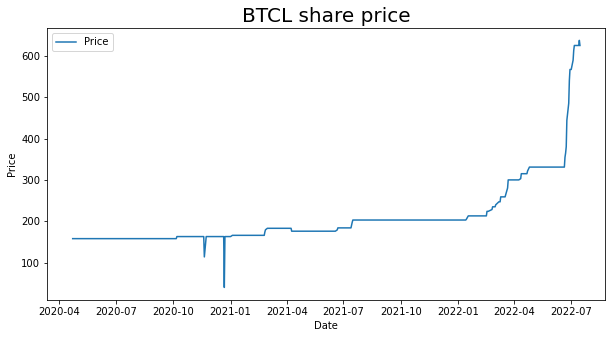

In [5]:
plt.figure(figsize=(10,5))
plt.plot(data['price'],label='Price')
plt.title('BTCL share price', fontsize=20)
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(data['price'], model ='additive',period=1)

In [7]:
trend = decomposed.trend
seasonal = decomposed.seasonal 
residual = decomposed.resid

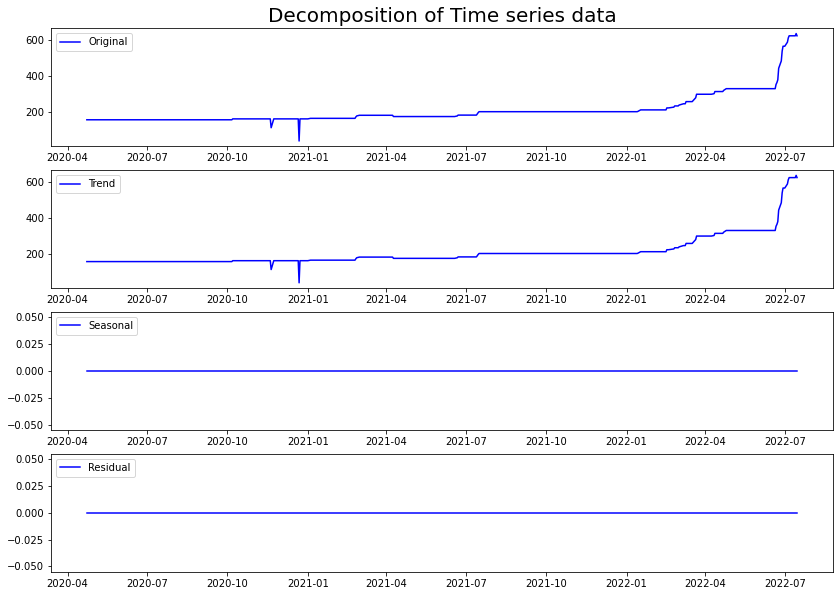

In [8]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.title('Decomposition of Time series data', fontsize=20)
plt.plot(data['price'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='blue')
plt.legend(loc='upper left')
plt.show()

In [9]:
from pmdarima.arima import auto_arima

In [10]:
sarima_model = auto_arima(data['price'], start_p = 1, d=2, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=2, m = 12, 
                          start_P = 0, D=2, start_Q=0, max_P=5, max_D=2, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)   

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,2,0)[12]             : AIC=4740.056, Time=0.20 sec
 ARIMA(0,2,0)(0,2,0)[12]             : AIC=5219.937, Time=0.07 sec
 ARIMA(1,2,0)(1,2,0)[12]             : AIC=4619.711, Time=0.27 sec
 ARIMA(0,2,1)(0,2,1)[12]             : AIC=inf, Time=1.04 sec
 ARIMA(1,2,0)(0,2,0)[12]             : AIC=4951.795, Time=0.12 sec
 ARIMA(1,2,0)(2,2,0)[12]             : AIC=4485.068, Time=0.85 sec
 ARIMA(1,2,0)(3,2,0)[12]             : AIC=4409.150, Time=1.78 sec
 ARIMA(1,2,0)(4,2,0)[12]             : AIC=4360.631, Time=4.29 sec
 ARIMA(1,2,0)(5,2,0)[12]             : AIC=4328.690, Time=9.60 sec
 ARIMA(1,2,0)(5,2,1)[12]             : AIC=inf, Time=27.94 sec
 ARIMA(1,2,0)(4,2,1)[12]             : AIC=inf, Time=18.40 sec
 ARIMA(0,2,0)(5,2,0)[12]             : AIC=4608.943, Time=3.52 sec
 ARIMA(2,2,0)(5,2,0)[12]             : AIC=4233.190, Time=4.43 sec
 ARIMA(2,2,0)(4,2,0)[12]             : AIC=4267.832, Time=3.50 sec
 ARIMA(2,2,0)(5,2,1)[12]        

In [51]:
print(sarima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  548
Model:             SARIMAX(5, 2, 0)x(5, 2, 0, 12)   Log Likelihood               -2064.787
Date:                            Fri, 19 Aug 2022   AIC                           4151.573
Time:                                    10:40:14   BIC                           4198.407
Sample:                                         0   HQIC                          4169.917
                                            - 548                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1414      0.011   -105.530      0.000      -1.163      -1.120
ar.L2         -0.9256      0.025   

In [52]:
size = int(len(data) * 0.65)
X_train, X_test = data[0:size], data[size:len(data)]

In [53]:
X_train

,price
date,
2020-04-23,158.0
2020-04-24,158.0
2020-04-27,158.0
2020-04-28,158.0
2020-04-29,158.0
...,...
2021-09-23,203.0
2021-09-24,203.0
2021-09-27,203.0


In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [55]:
model = SARIMAX(X_train['price'], order = (5, 2, 0), seasonal_order =(0, 0, 0, 0)) 

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [56]:
result = model.fit() 
print(result.summary()) 

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  356
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -1295.644
Date:                Fri, 19 Aug 2022   AIC                           2603.287
Time:                        10:40:15   BIC                           2626.503
Sample:                             0   HQIC                          2612.524
                                - 356                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4040      0.009   -152.521      0.000      -1.422      -1.386
ar.L2         -1.3850      0.021    -67.216      0.000      -1.425      -1.345
ar.L3         -1.0977      0.034    -32.365      0.0

In [57]:
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index,typ='levels',dynamic = False) 
#train_prediction = result.predict(X_train) 

In [58]:
print(train_prediction)

date
2020-04-23      0.000000
2020-04-24    236.996135
2020-04-27    158.031218
2020-04-28    158.013001
2020-04-29    158.007782
                 ...    
2021-09-23    203.000000
2021-09-24    203.000000
2021-09-27    203.000000
2021-09-28    203.000000
2021-09-29    203.000000
Name: predicted_mean, Length: 356, dtype: float64


In [59]:
start_index = len(X_train)
end_index = len(data)-1
test_prediction = result.predict(start_index, end_index,typ='levels',dynamic = False)

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [60]:
test_prediction

356    203.0
357    203.0
358    203.0
359    203.0
360    203.0
       ...  
543    203.0
544    203.0
545    203.0
546    203.0
547    203.0
Name: predicted_mean, Length: 192, dtype: float64

In [61]:
test_prediction = test_prediction.to_frame()
test_prediction

,predicted_mean
356,203.0
357,203.0
358,203.0
359,203.0
360,203.0
...,...
543,203.0
544,203.0
545,203.0
546,203.0


In [62]:
X_test

,price
date,
2021-09-30,203.0
2021-10-01,203.0
2021-10-04,203.0
2021-10-05,203.0
2021-10-06,203.0
...,...
2022-07-11,625.0
2022-07-12,625.0
2022-07-13,625.0


In [63]:
test_prediction['date'] = pd.date_range(start='2021-09-30', periods=len(X_test), freq='D')
test_prediction

,predicted_mean,date
356,203.0,2021-09-30
357,203.0,2021-10-01
358,203.0,2021-10-02
359,203.0,2021-10-03
360,203.0,2021-10-04
...,...,...
543,203.0,2022-04-05
544,203.0,2022-04-06
545,203.0,2022-04-07
546,203.0,2022-04-08


In [64]:
test_prediction = test_prediction.set_index('date')
test_prediction

,predicted_mean
date,
2021-09-30,203.0
2021-10-01,203.0
2021-10-02,203.0
2021-10-03,203.0
2021-10-04,203.0
...,...
2022-04-05,203.0
2022-04-06,203.0
2022-04-07,203.0


In [65]:
test_prediction = test_prediction.rename(columns = {'predicted_mean':'predicted_price'})
test_prediction

,predicted_price
date,
2021-09-30,203.0
2021-10-01,203.0
2021-10-02,203.0
2021-10-03,203.0
2021-10-04,203.0
...,...
2022-04-05,203.0
2022-04-06,203.0
2022-04-07,203.0


In [66]:
test_prediction = pd.Series(test_prediction['predicted_price'], index=test_prediction.index)
test_prediction

date
2021-09-30    203.0
2021-10-01    203.0
2021-10-02    203.0
2021-10-03    203.0
2021-10-04    203.0
              ...  
2022-04-05    203.0
2022-04-06    203.0
2022-04-07    203.0
2022-04-08    203.0
2022-04-09    203.0
Name: predicted_price, Length: 192, dtype: float64

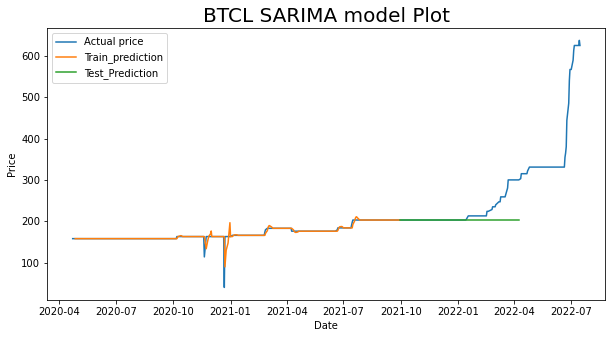

In [67]:
plt.figure(figsize=(10,5))
plt.plot(data['price'],label='Actual price')
plt.plot(train_prediction.iloc[2:],label='Train_prediction')
plt.plot(test_prediction, label='Test_Prediction')
plt.title('BTCL SARIMA model Plot', fontsize=20)
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [68]:
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from math import sqrt
RMSE=math.sqrt(mean_squared_error(X_train,train_prediction))
MAE=mean_absolute_error(X_train,train_prediction)
R2=r2_score(X_train,train_prediction)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R-Squared:", R2)

RMSE: 13.227492343907276
MAE: 2.489431843643346
R-Squared: 0.41317563786786726


In [69]:
RMSE=math.sqrt(mean_squared_error(X_test,test_prediction))
MAE=mean_absolute_error(X_test,test_prediction)
R2=r2_score(X_test,test_prediction)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R-Squared:", R2)

RMSE: 133.14967846374995
MAE: 78.14895833333334
R-Squared: -0.5255104010946263


In [70]:
forecast = result.predict(start = len(data),  
                          end = (len(data)-1) + 30,  
                          typ = 'levels')

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [71]:
forecast

548    203.0
549    203.0
550    203.0
551    203.0
552    203.0
553    203.0
554    203.0
555    203.0
556    203.0
557    203.0
558    203.0
559    203.0
560    203.0
561    203.0
562    203.0
563    203.0
564    203.0
565    203.0
566    203.0
567    203.0
568    203.0
569    203.0
570    203.0
571    203.0
572    203.0
573    203.0
574    203.0
575    203.0
576    203.0
577    203.0
Name: predicted_mean, dtype: float64

In [72]:
forecast = forecast.to_frame()
forecast.head()

,predicted_mean
548,203.0
549,203.0
550,203.0
551,203.0
552,203.0


In [73]:
data

,price
date,
2020-04-23,158.0
2020-04-24,158.0
2020-04-27,158.0
2020-04-28,158.0
2020-04-29,158.0
...,...
2022-07-11,625.0
2022-07-12,625.0
2022-07-13,625.0


In [74]:
forecast['date'] = pd.date_range(start='2022-07-15', periods=30, freq='D')
forecast.head()

,predicted_mean,date
548,203.0,2022-07-15
549,203.0,2022-07-16
550,203.0,2022-07-17
551,203.0,2022-07-18
552,203.0,2022-07-19


In [75]:
forecast = forecast.set_index('date')
forecast.head()

,predicted_mean
date,
2022-07-15,203.0
2022-07-16,203.0
2022-07-17,203.0
2022-07-18,203.0
2022-07-19,203.0


In [76]:
forecast = forecast.rename(columns = {'predicted_mean':'predicted_price'})
forecast.head()

,predicted_price
date,
2022-07-15,203.0
2022-07-16,203.0
2022-07-17,203.0
2022-07-18,203.0
2022-07-19,203.0


In [77]:
forcast = pd.Series(forecast['predicted_price'], index=test_prediction.index)
forecast

,predicted_price
date,
2022-07-15,203.0
2022-07-16,203.0
2022-07-17,203.0
2022-07-18,203.0
2022-07-19,203.0
2022-07-20,203.0
2022-07-21,203.0
2022-07-22,203.0
2022-07-23,203.0


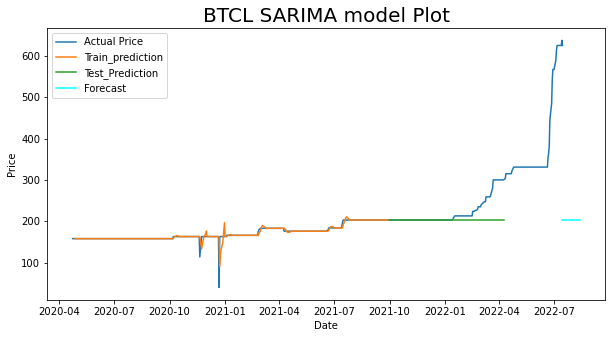

In [78]:
plt.figure(figsize=(10,5))
plt.plot(data['price'],label='Actual Price')
plt.plot(train_prediction.iloc[2:],label='Train_prediction')
plt.plot(test_prediction, label='Test_Prediction')
plt.plot(forecast, label='Forecast', color='cyan')
plt.title('BTCL SARIMA model Plot', fontsize=20)
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [79]:
test_prediction

date
2021-09-30    203.0
2021-10-01    203.0
2021-10-02    203.0
2021-10-03    203.0
2021-10-04    203.0
              ...  
2022-04-05    203.0
2022-04-06    203.0
2022-04-07    203.0
2022-04-08    203.0
2022-04-09    203.0
Name: predicted_price, Length: 192, dtype: float64

In [80]:
type(test_prediction)

pandas.core.series.Series

In [81]:
test_prediction = test_prediction.to_frame()
test_prediction

,predicted_price
date,
2021-09-30,203.0
2021-10-01,203.0
2021-10-02,203.0
2021-10-03,203.0
2021-10-04,203.0
...,...
2022-04-05,203.0
2022-04-06,203.0
2022-04-07,203.0


In [82]:
test_prediction = test_prediction.to_csv('predictedData/btcl_sarima_testPred.csv')

In [83]:
forecast.head()

,predicted_price
date,
2022-07-15,203.0
2022-07-16,203.0
2022-07-17,203.0
2022-07-18,203.0
2022-07-19,203.0


In [84]:
forecast = forecast.to_csv('predictedData/btcl_sarima_forecast.csv')